In [5]:
# 사용할 패키지를 import합니다
import sys
print('python', sys.version)

import numpy as np
import pandas as pd
import matplotlib as mpl

import glob
import pickle
import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic") # window
plt.rc("axes", unicode_minus=False) # x,y축 (-)부호 표시

import seaborn as sns

# 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
#from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix


python 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]


# XGBoost modeling

In [6]:
def XGBoost(X_train, X_test, y_train, y_test):
    # Create XGBoost classifer object
    xgb = XGBClassifier()

    # Train XGBoost Classifer
    model=xgb.fit(X_train, y_train)

    # Predict the response for test dataset
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)

    # Model Accuracy, how often is the classifier correct?
    APR=metrics.average_precision_score(y_test, y_pred_prob[:,1], average='weighted')
    AUC=metrics.roc_auc_score(y_test, y_pred_prob[:,1])

    return APR, AUC, list(model.feature_names_in_), list(model.feature_importances_)

In [8]:
## ccle
ccle_genes=list(pd.read_table('D:/jmjung/n_stage_pred_BRCA/data/ccle_gene_list.txt')['gene'])
len(ccle_genes)
for file_name in glob.glob("D:/jmjung/n_stage_pred_BRCA/mid_result/merged_data/*.pickle"):
    with open(file_name, 'rb') as f:
        mer_table = pickle.load(f)

    can_code=file_name.split('\\')[-1].split('.')[0]
    can_code
    
    ## genes in CCLE database only
    shared_cols=list(set(mer_table.columns)&set(ccle_genes))+['class']
    mer_table=mer_table[shared_cols]
    mer_table

19177

'BRCA'

,ROS1,CIT,QPCT,CDKN2B,HOXA6,LEAP2,IGSF9B,DAPK2,GDF6,CALML6,...,IL12RB1,OR4F15,SERPINA1,DUSP22,YPEL2,CNNM2,FXYD7,ADCY9,TCTN2,class
TCGA-3C-AALI,0.010306,1.456754,2.051677,1.849047,0.188581,0.638804,0.043768,0.652017,0.176101,0.211116,...,1.282732,0.0,5.877026,2.008215,3.034298,0.325806,0.123847,1.428158,2.253877,1
TCGA-3C-AALJ,0.000000,1.307959,3.869290,2.341699,0.090629,0.746968,0.068194,0.742213,0.323281,1.557508,...,1.097301,0.0,2.417915,2.550242,2.573837,0.523155,0.125089,1.618352,2.224229,1
TCGA-4H-AAAK,0.034794,0.594698,1.697470,3.363410,0.312001,0.593022,0.239298,0.888850,0.555617,0.269863,...,0.737670,0.0,3.378648,2.548517,2.281207,0.746152,0.058102,2.126927,2.466740,1
TCGA-5L-AAT0,0.028878,0.370058,2.149981,2.680688,0.342702,0.882857,0.740912,0.709551,0.061685,0.401069,...,1.260885,0.0,3.795926,2.891580,2.635090,1.461069,0.115221,2.688688,2.572425,0
TCGA-5L-AAT1,0.037789,0.359368,2.158365,2.368310,0.251355,0.378890,0.460227,0.915401,0.412191,0.302827,...,1.958115,0.0,4.478420,2.730198,2.404246,0.642434,0.242550,1.647189,2.736960,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-WT-AB41,0.045377,0.504071,2.910391,1.157061,0.000000,0.907677,0.320178,1.383696,0.000000,2.216651,...,1.805252,0.0,3.895624,3.646790,1.455924,0.723574,0.903510,2.445711,1.638363,1
TCGA-XX-A899,0.006844,0.604240,2.506852,3.220456,0.248974,0.938226,0.605302,1.365307,0.145883,0.315077,...,1.260636,0.0,4.262424,3.483215,2.127204,0.488681,0.372356,2.221965,2.265481,1
TCGA-XX-A89A,0.015512,0.459931,2.125812,3.691549,0.273034,0.962686,0.393126,1.577133,0.373982,0.389786,...,1.320132,0.0,4.890898,3.190346,2.334859,0.819426,0.135997,3.385829,2.146860,0
TCGA-Z7-A8R5,0.000000,0.218079,2.525615,2.233162,0.278583,1.056982,0.285755,1.492891,0.113983,0.415901,...,0.998907,0.0,6.385138,3.598961,2.160620,0.693309,0.198447,1.949154,2.351595,1


In [3]:
## ccle
ccle_genes=list(pd.read_table('D:/jmjung/n_stage_pred_BRCA/data/ccle_gene_list.txt')['gene'])

for file_name in glob.glob("D:/jmjung/n_stage_pred_BRCA/mid_result/merged_data/*.pickle"):
    with open(file_name, 'rb') as f:
        mer_table = pickle.load(f)

    can_code=file_name.split('\\')[-1].split('.')[0]
    can_code
    
    ## genes in CCLE database only
    shared_cols=list(set(mer_table.columns)&set(ccle_genes))+['class']
    mer_table=mer_table[shared_cols]
    
    for rd in range(11):
        print('############', can_code, '=========', rd)
        ## X, y preparation
        X=mer_table.drop(columns='class')
        if rd==0:
            y=mer_table['class']
        else:
            y=mer_table['class'].sample(len(mer_table))
            
        for it in range(50):
            ## split traing and test data
            X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y)

            ## machine learning model: (XGBoost)
            APR, AUC, FTN, FTI=XGBoost(X_train, X_test, y_train, y_test)

            if it==0:
                res_df1=pd.DataFrame(columns=['APR','AUC']+FTN)
            else:
                if list(res_df1.columns)[2:]!=FTN:
                    print('Not matched columns !!!!')
                    Error

            res_df1.loc[it]=[APR, AUC]+FTI
        
        if rd==0:
            with open('D:/jmjung/n_stage_pred_BRCA/mid_result/xgb_result/{}_ori{}.pickle'.format(can_code, rd), 'wb') as f:
                pickle.dump(res_df1, f)
        else:
            with open('D:/jmjung/n_stage_pred_BRCA/mid_result/xgb_result/{}_ran{}.pickle'.format(can_code, rd), 'wb') as f:
                pickle.dump(res_df1, f) 


'BRCA'

############ BRCA ========= 0
############ BRCA ========= 1
############ BRCA ========= 2
############ BRCA ========= 3
############ BRCA ========= 4
############ BRCA ========= 5
############ BRCA ========= 6
############ BRCA ========= 7
############ BRCA ========= 8
############ BRCA ========= 9
############ BRCA ========= 10


# Fig S2

(0.6917643923240938, 0.49347014925373134, 0.5933768656716417)

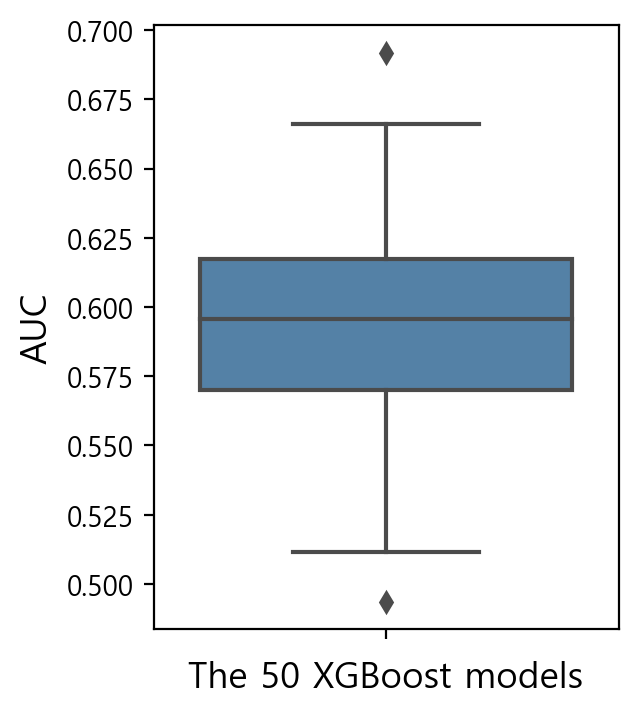

In [18]:
fig = plt.figure(figsize=(3,4), dpi=200)
ax=fig.subplots()

## fig 1a
with open("D:/jmjung/n_stage_pred_BRCA/mid_result/xgb_result/BRCA_ori0.pickle", 'rb') as f:
    ori_fti= pickle.load(f)

ori_fti['AUC'].max(), ori_fti['AUC'].min(), ori_fti['AUC'].mean()

_=sns.boxplot(data=ori_fti, y='AUC', ax=ax, color='steelblue')
_=ax.set_ylabel('AUC', fontsize=13)
_=ax.set_xlabel('The 50 XGBoost models', fontsize=13)
_=ax.tick_params(axis='both', labelsize=10)